In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import copy
from scipy.stats import chisquare , chi2_contingency , f_oneway , ttest_1samp , ttest_ind , ttest_rel , kruskal , kstest
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("bike_sharing.csv")

df = copy.deepcopy( data )

Problem statement - On our given data we have to check does different type of season , holidays ,working day, temprature, conditon or weather effect the rental cycles of yulu or not , if it effects then how much it is affecting the number of rental cycles for this we are doing statistical hypothesis and showing that it is affecting or not the number of rental cycles.

# Obeservation of Data -

In [2]:
# Given data 

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape 

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
# columns and types of data 

df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Missing value detection -

In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Statistical summary - 

   In our given data we can see that there are 10886 rows and 12 columnns and In those columns 3 columns are float type of data , 8 columns are integer type of data and 1 column has object type of data and In given data there is not any null value in data  , there are 191 mean count in our data .

In [8]:
# Unique attributes 

for i in df.columns :
 print( i, ":" , df[i].nunique() )
 print("--"*50)

datetime : 10886
----------------------------------------------------------------------------------------------------
season : 4
----------------------------------------------------------------------------------------------------
holiday : 2
----------------------------------------------------------------------------------------------------
workingday : 2
----------------------------------------------------------------------------------------------------
weather : 4
----------------------------------------------------------------------------------------------------
temp : 49
----------------------------------------------------------------------------------------------------
atemp : 60
----------------------------------------------------------------------------------------------------
humidity : 89
----------------------------------------------------------------------------------------------------
windspeed : 28
---------------------------------------------------------------------------

We can see the unique attributes of the each column of the data .

# Visual Analysis - 

## Univariate Analysis -

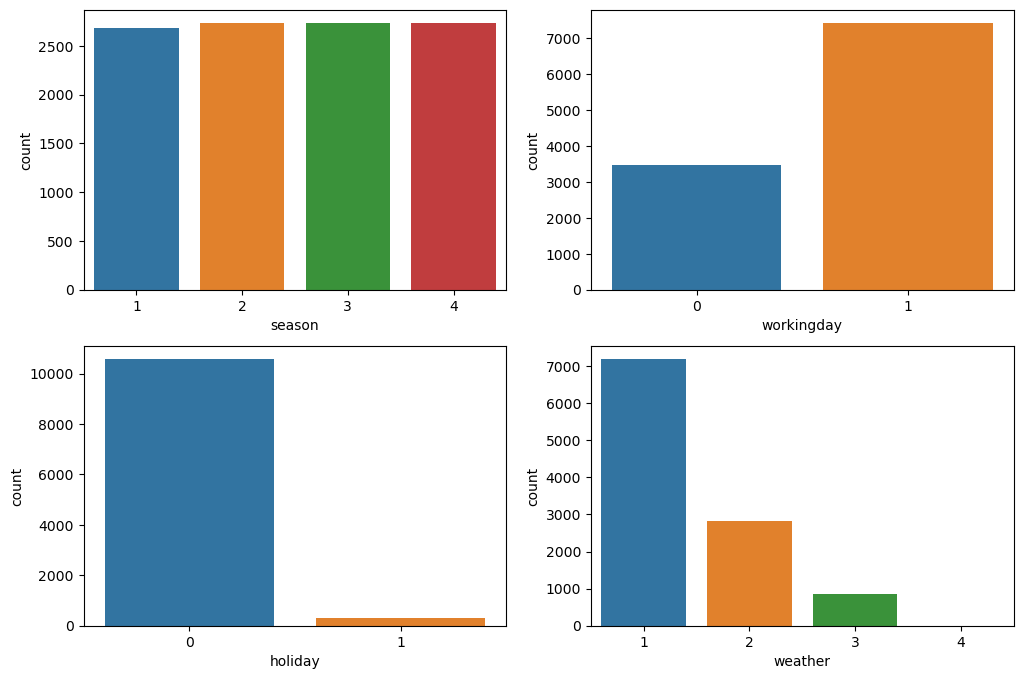

In [9]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.countplot( data = df , x = "season")

plt.subplot(2,2,2)
sns.countplot( data = df , x = "workingday")

plt.subplot(2,2,3)
sns.countplot( data = df , x = "holiday")

plt.subplot(2,2,4)
sns.countplot( data = df , x = "weather")

plt.show()

From above graph we can see that each season has almost same number of customer , where non holidays have less number of customer and working day data is representing the same and weather 1 has maximum number of customer in our given data followed by 2nd and 3rd weather and 4th weather has minimum ( negligible ) data .

 Distribution of data -

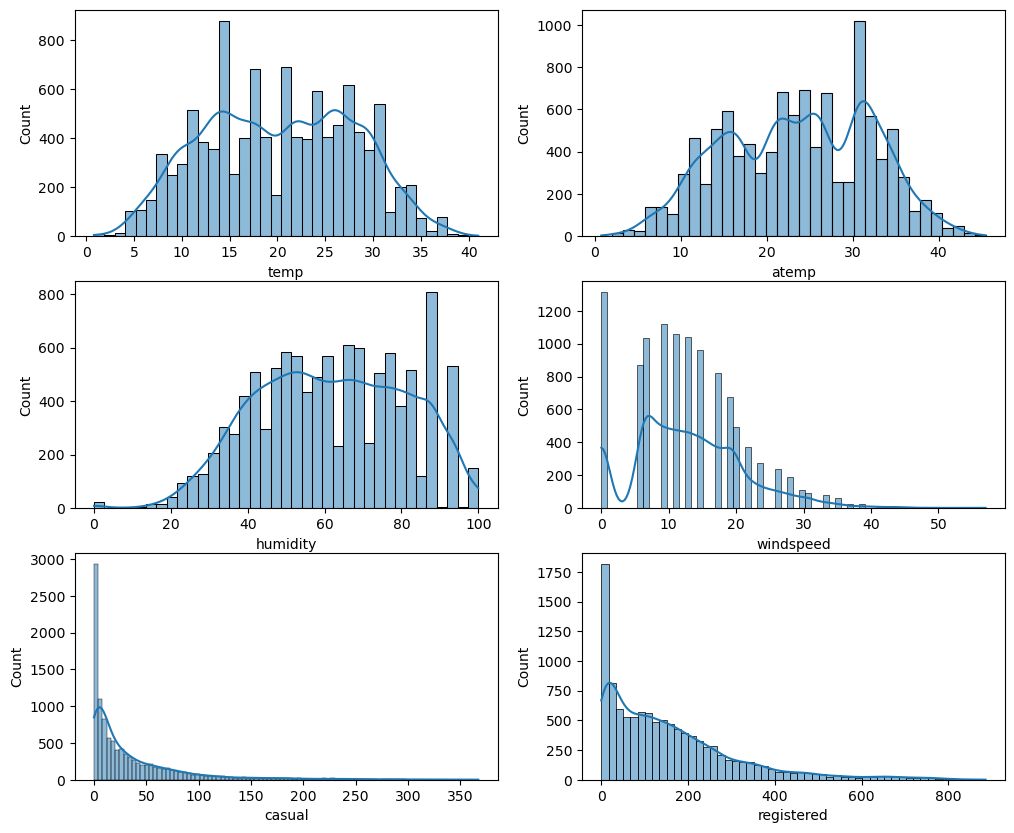

In [10]:
plt.figure( figsize = (12,10))

plt.subplot(3,2,1)
sns.histplot( data= df , x = "temp",kde = True )

plt.subplot(3,2,2)
sns.histplot( data= df , x = "atemp",kde = True )

plt.subplot(3,2,3)
sns.histplot( data= df , x = "humidity",kde = True )

plt.subplot(3,2,4)
sns.histplot( data= df , x = "windspeed",kde = True )

plt.subplot(3,2,5)
sns.histplot( data = df , x = "casual" , kde = True)

plt.subplot(3,2,6)
sns.histplot( data = df , x = "registered" , kde = True)

plt.show()

From above data we can see that temp , atemp and humidity follows normal distribution while casual and registered data follows look like log-normal distribution .

Distribution of data using qqplot

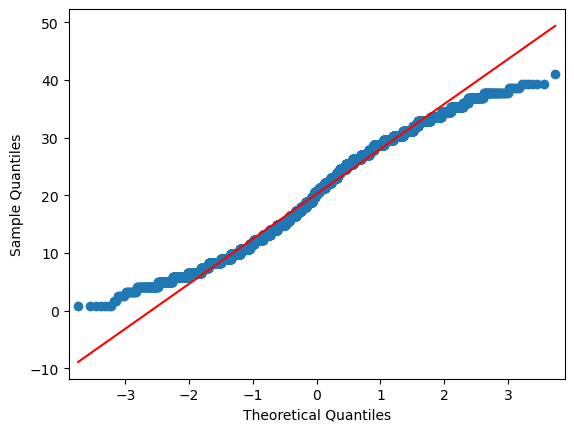

In [11]:
sm.qqplot( data = df["temp"] , dist = st.distributions.norm , line = "s")


plt.show()

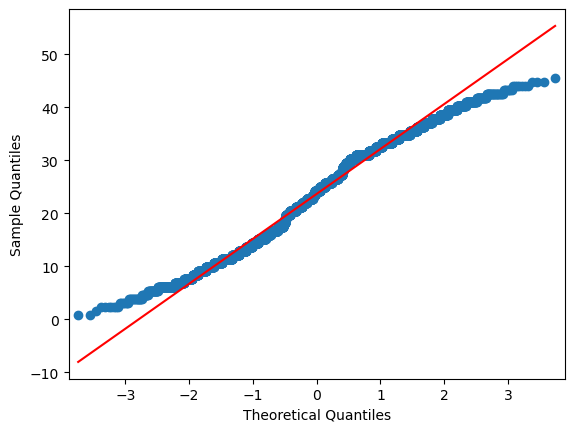

In [12]:
sm.qqplot( data = df["atemp"] , dist = st.distributions.norm , line = "s")
plt.show()

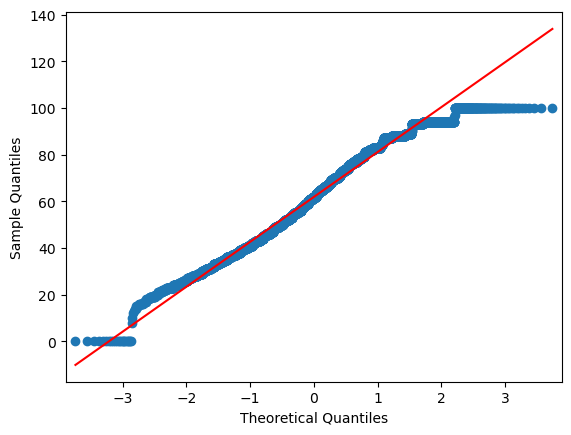

In [13]:
sm.qqplot( data = df["humidity"] , dist = st.distributions.norm , line = "s")
plt.show()

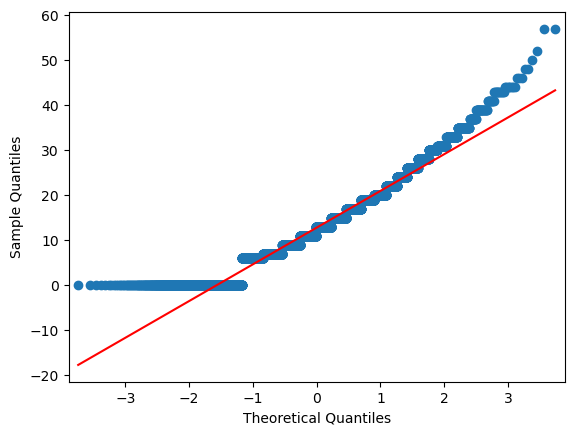

In [14]:
sm.qqplot( data = df["windspeed"] , dist = st.distributions.norm , line = "s")
plt.show()

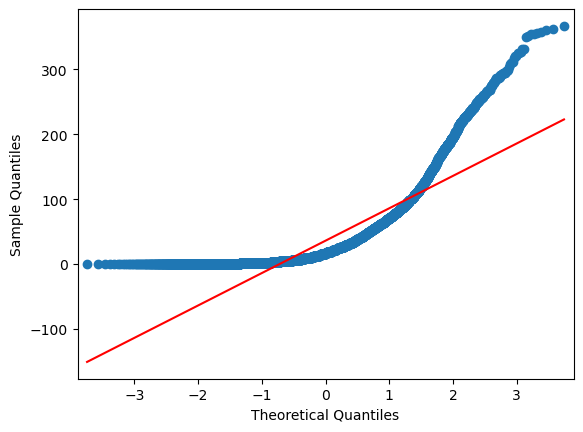

In [15]:
sm.qqplot( data = df["casual"] , dist = st.distributions.norm , line = "s")
plt.show()

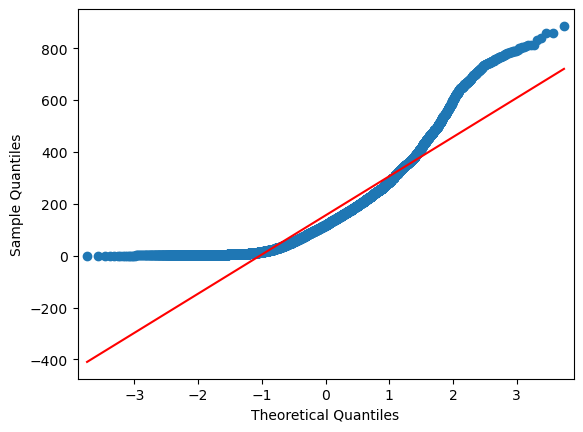

In [16]:
sm.qqplot( data = df["registered"] , dist = st.distributions.norm , line = "s")
plt.show()

## Bivariate Analysis - 

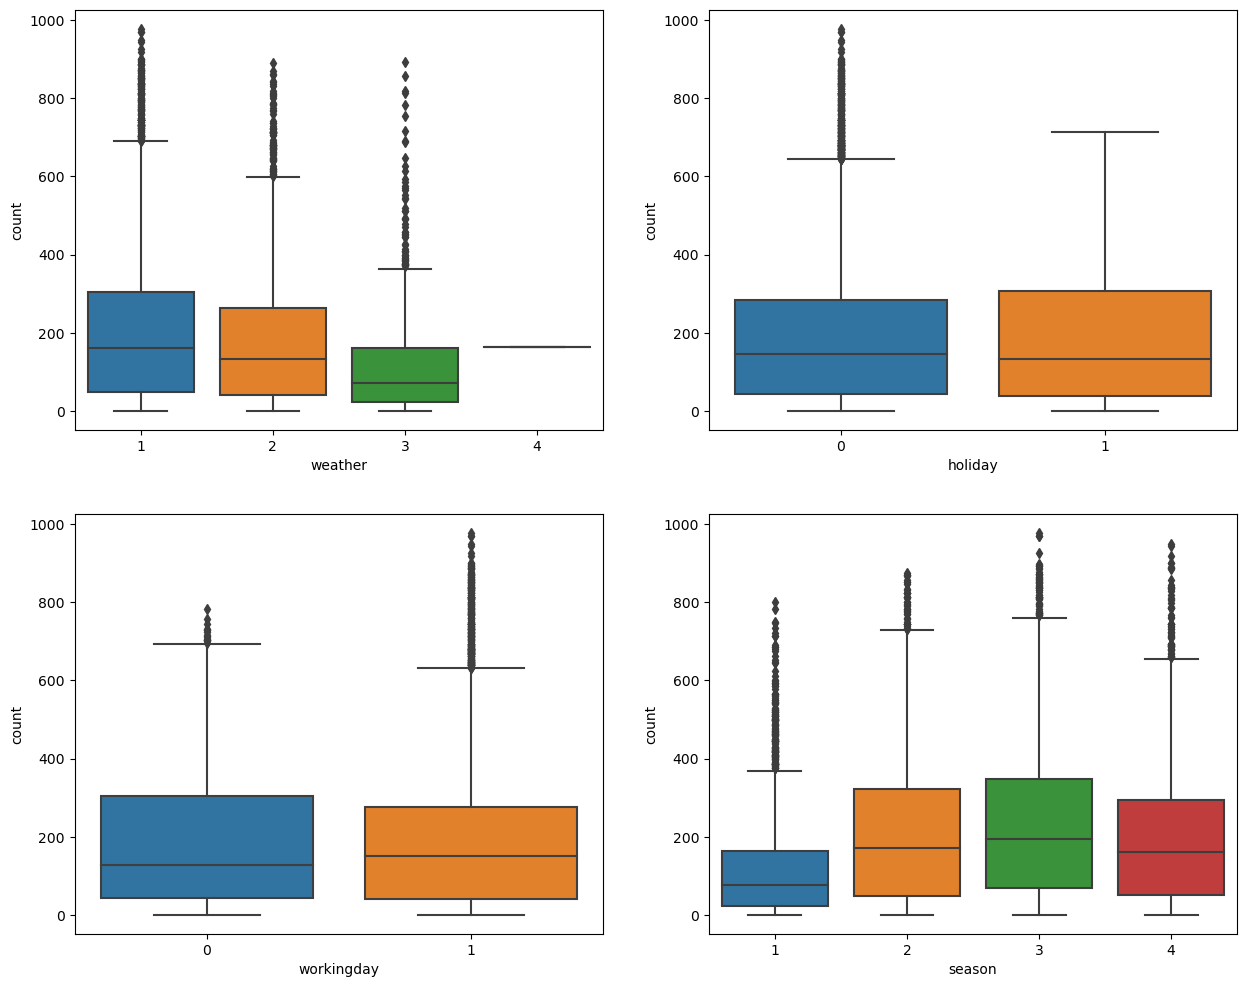

In [17]:
plt.figure( figsize = (15,12))

plt.subplot(2,2,1)
sns.boxplot( data = df , y = "count" , x= "weather")

plt.subplot(2,2,2)
sns.boxplot( data = df , y = "count" , x= "holiday")

plt.subplot(2,2,3)
sns.boxplot( data = df , y = "count" , x= "workingday")

plt.subplot(2,2,4)
sns.boxplot( data = df , y = "count" , x= "season")

plt.show()

From above graph we can see that there are outliners in weather data for all seasons (except 4 because 4th season is single data) and for non-holidays there are outliers but for working day we have outliers of data for both working and non-working day , and all seasons have outliers of data.

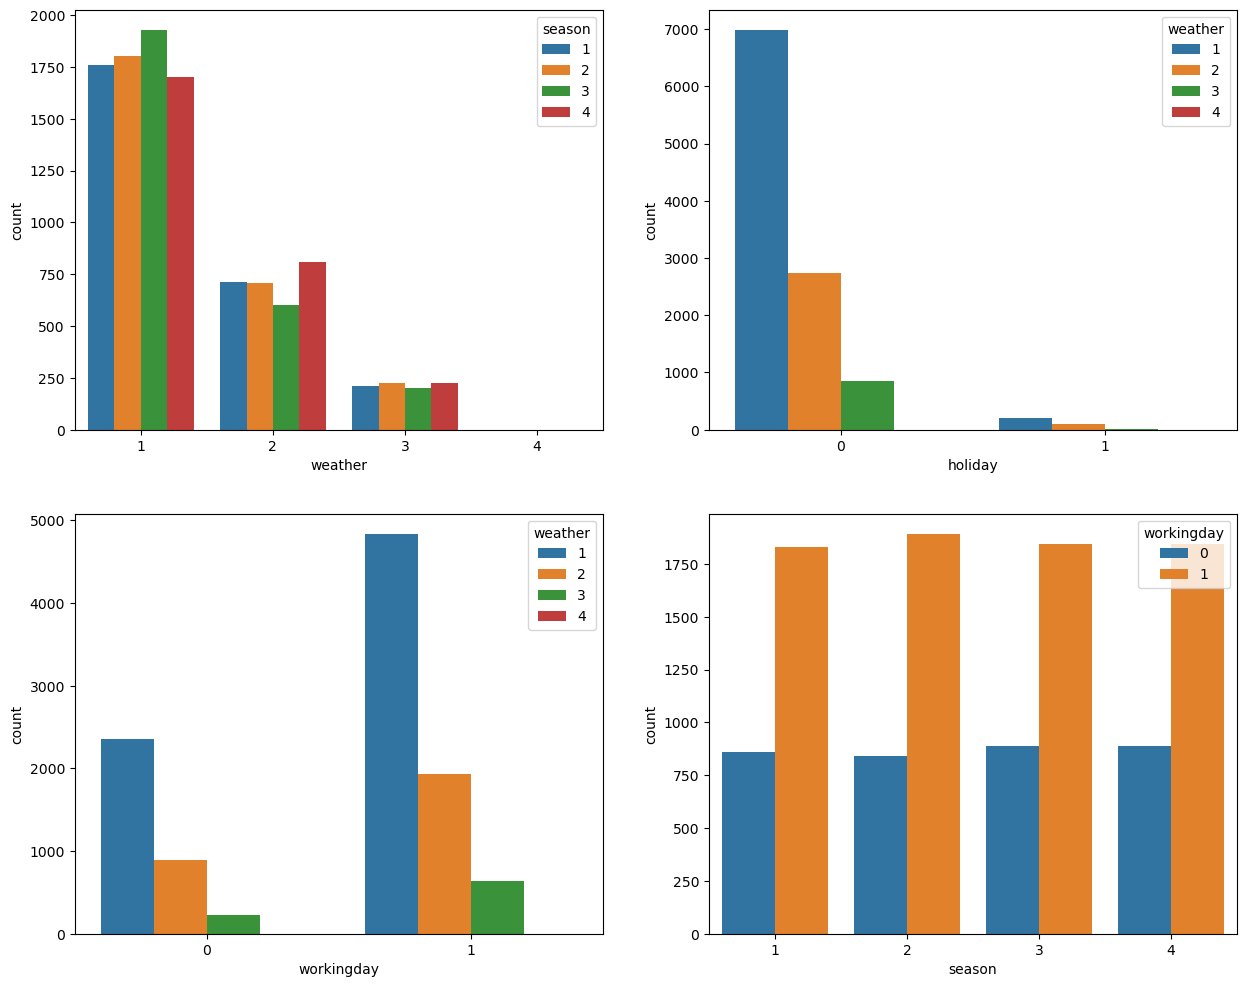

In [18]:
plt.figure( figsize = (15,12))

plt.subplot(2,2,1)
sns.countplot( data = df , x = "weather" , hue = "season")

plt.subplot(2,2,2)
sns.countplot( data = df , x = "holiday" , hue = "weather")

plt.subplot(2,2,3)
sns.countplot( data = df , x = "workingday" , hue = 'weather')

plt.subplot(2,2,4)
sns.countplot( data = df  , x = "season" , hue = "workingday")

plt.show()

From above data we can see that weather 1 has maximum count and it does not effect on season , whether non-holidays has most count and it shows on working data too where weather 1 has maximum count following by 2nd and 3rd weather all season has equal number of count and it does not effect on working day.

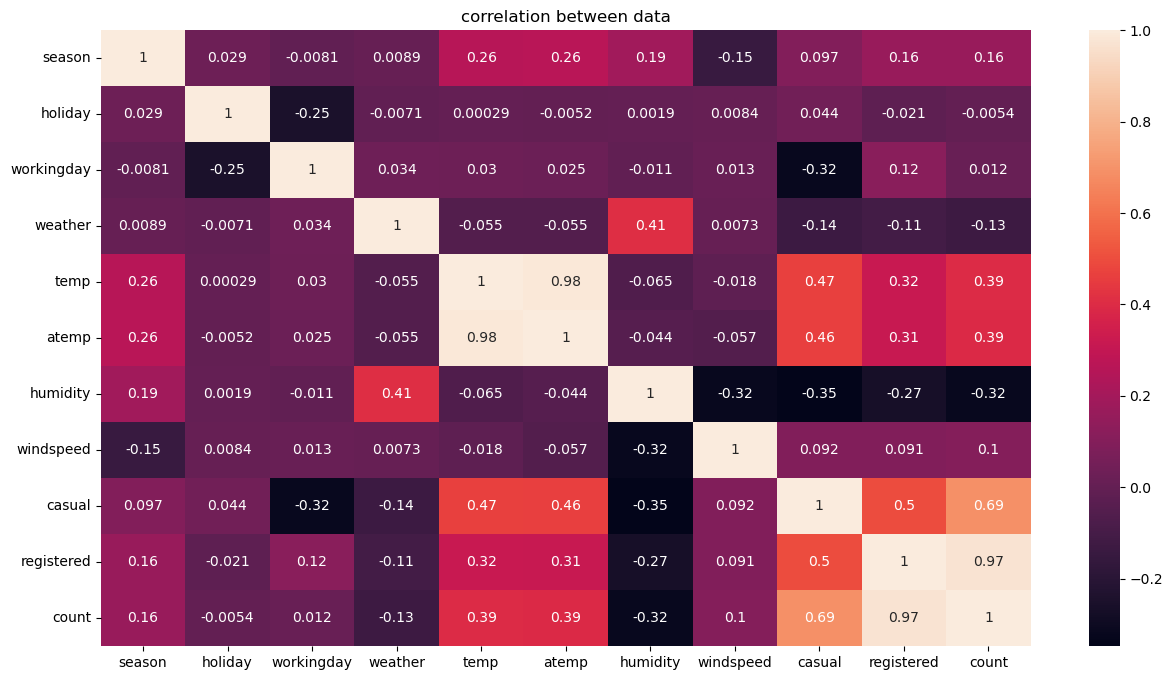

In [19]:
# correlation between data 

plt.figure( figsize = (15,8))
sns.heatmap( data = df.corr() , annot = True)
plt.title("correlation between data")
plt.show()

we can see that the different correlation between groups of data where some groups are highly correalted , most of groups are positively correlated and few groups are negatively correlated .

## Working Day has effect on number of electric cycles rented 

Null hypothesis and alternative hypothesis 

Ho - working day has no effect on number of cycles rented ( mean of working day cycles rented = mean of non working day cycles rented ) 

Ha - working day has some effect on number of cycles rented ( mean of working day cycles rented != mean of non working day cycles rented )


Taking signifance level ( alpha ) = 0.05 


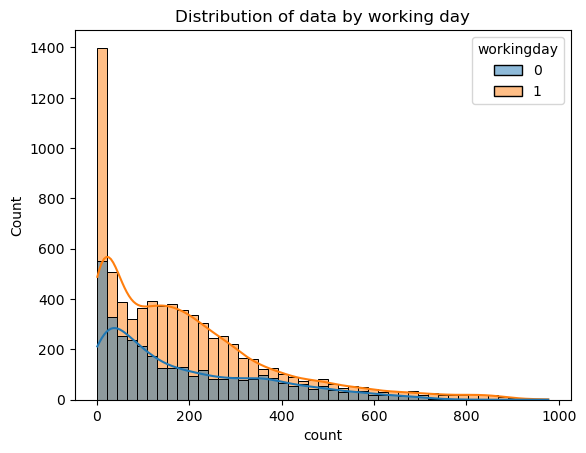

In [20]:
sns.histplot( data =df , x = "count" , hue = "workingday" , kde = True )
plt.title("Distribution of data by working day")
plt.show()

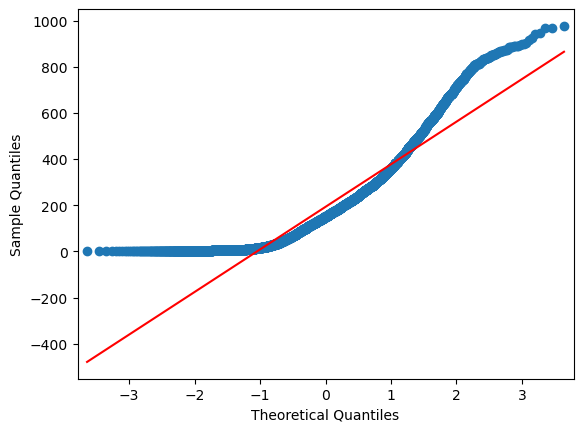

In [21]:
a = df.loc[ df["workingday"] == 1]["count"]
x = sm.qqplot( data = a , line = "s" , dist = st.norm)

In [31]:
# This distributin does not follow normal distribution 
# For this data we'll use 2 sample t-test 
alpha = 0.05

wroking_day_count = df.loc[ df["workingday"] == 1]["count"]
non_wroking_day_count = df.loc[ df["workingday"] == 0 ]["count"]

t_stats , p_value = ttest_ind(wroking_day_count , non_wroking_day_count)
print( "test statistics :" , t_stats)
print( "p value :" , p_value)

if p_value < alpha : 
    print("Reject Ho")
else :
    print("Fail to reject Ho")

test statistics : 1.2096277376026694
p value : 0.22644804226361348
Fail to reject Ho


Since our p value is 1.0 and significance value is 0.05 so our p value is greater than significance level we fail to reject null hypothesis that means working day and non working day does not effect on number of cycles rented.


## No. of cycles rented is similar or different in different 
## 1. weather 

For weather -

Null hypothesis and alternative hypothesis - 

Ho - Number of cycles rented is similar for all the weather ( mean cycles rented on weather 1 =  mean cycles rented on weather 2       =  mean cycles rented on weather 3 =  mean cycles rented on weather 4 )

Ha - Number of cycles rented is different for all the weather (  mean cycles rented on weather 1 !=  mean cycles rented on weather 2 !=  mean cycles rented on weather 3 !=  mean cycles rented on weather 4 ) 


Taking significance level ( alpha ) = 0.05 

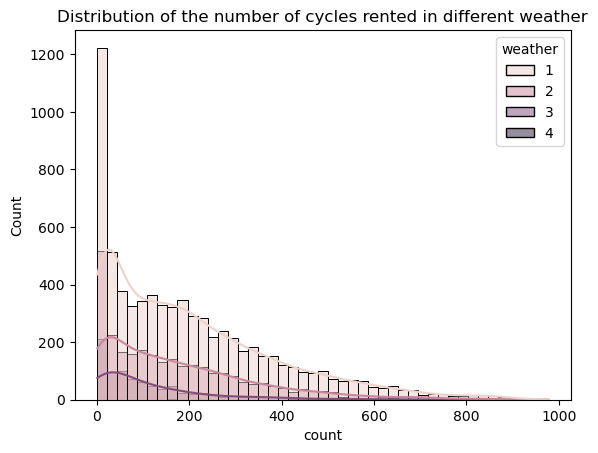

In [23]:
sns.histplot( data =df , x = "count" , hue = "weather" , kde = True )
plt.title("Distribution of the number of cycles rented in different weather")
plt.show()

In [24]:
# For different types of weather we'll use anova test 
alpha = 0.05 

weather1 = df.loc[ df["weather"] == 1]["count"]
weather2 = df.loc[ df["weather"] == 2]["count"]
weather3 = df.loc[ df["weather"] == 3]["count"]
weather4 = df.loc[ df["weather"] == 4]["count"]


test_statistics , p_value = f_oneway(weather1 , weather2 , weather3 , weather4)

print("test statistics :" , test_statistics )
print( "p value :" , p_value)

if p_value < alpha : 
    print("Reject Ho")
else :
    print("Fail to reject Ho")

test statistics : 65.53024112793271
p value : 5.482069475935669e-42
Reject Ho


Since we can clearly see that our p-value is less than significance level (alpha) so we reject our null hypothesis that number of cycles rented is same for every season, and we can clearly see on data that there is significance difference on weather.

so the number of cycles rented depends on weather type.

## 2. season

Null hypothesis and alternative hypothesis - 

Ho - Number of cycles rented is similar for all the season ( mean cycles rented on season 1 =  mean cycles rented on season 2       =  mean cycles rented on season 3 =  mean cycles rented on season 4 )

Ha - Number of cycles rented is different for all the season (  mean cycles rented on season 1 !=  mean cycles rented on season 2 !=  mean cycles rented on season 3 !=  mean cycles rented on season 4 ) 


Taking significance level ( alpha ) = 0.05 

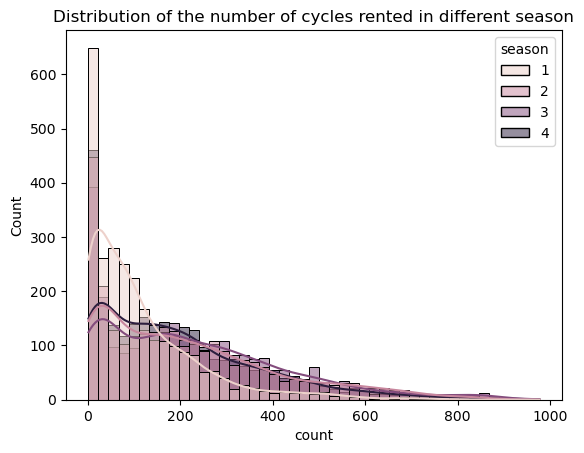

In [25]:
sns.histplot( data =df , x = "count" , hue = "season" , kde = True )
plt.title("Distribution of the number of cycles rented in different season")
plt.show()

In [26]:
# For different types of weather we'll use anova test 
alpha = 0.05 

season1 = df.loc[ df["season"] == 1]["count"]
season2 = df.loc[ df["season"] == 2]["count"]
season3 = df.loc[ df["season"] == 3]["count"]
season4 = df.loc[ df["season"] == 4]["count"]


test_statistics , p_value = f_oneway(season1 , season2 , season3 , season4)

print("test statistics :" , test_statistics )
print( "p value :" , p_value)

if p_value < alpha : 
    print("Reject Ho")
else :
    print("Fail to reject Ho")

test statistics : 236.94671081032106
p value : 6.164843386499654e-149
Reject Ho


In [27]:
# Confirmating test with kruskal - wallis test

alpha = 0.05 

season1 = df.loc[ df["season"] == 1]["count"]
season2 = df.loc[ df["season"] == 2]["count"]
season3 = df.loc[ df["season"] == 3]["count"]
season4 = df.loc[ df["season"] == 4]["count"]


test_statistics , p_value = kruskal(season1 , season2 , season3 , season4)

print("test statistics :" , test_statistics )
print( "p value :" , p_value)

if p_value < alpha : 
    print("Reject Ho")
else :
    print("Fail to reject Ho")

test statistics : 699.6668548181988
p value : 2.479008372608633e-151
Reject Ho


From above graph and data we can say that the number of cycles rented has significance difference on season on 95 percent of significance level and we can see that our p value is less than aplha value so we are rejecting our null hypothesis that means the number of cycles rented different for all season.

## Checking is weather dependent on the season 

Null hypothesis and alternative hypothesis 

Ho - weather is independent on the season 

Ha - weather is dependent on the season 

significance level ( alpha ) = 0.05 

In [28]:
weather_season = pd.crosstab( index = df["season"] , columns = df["weather"])
weather_season

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [30]:
test_statistics , p_value , dof , expected_freq = chi2_contingency( weather_season )

print( "test statistics :" ,test_statistics)
print( "p value : " , p_value)
print( "degree of freedom :", dof)

alpha = 0.05

if p_value < alpha : 
    print("Reject Ho")
else :
    print("Fail to reject Ho")

test statistics : 49.158655596893624
p value :  1.549925073686492e-07
degree of freedom : 9
Reject Ho


From above calculation we can see that our p value is less than alpha so we reject null hypothesis that means weather is dependent on the season.

# Insights - 

From above data, calculation and graphs we can clearly see that - 

1. weather is dependent on the season that proves our day to day life weather and season.
2. the number of electric cycles rented dependes on the season.
3. the number of customer rented electric cycles depends on weather types.
4. working day and non-working day does not effect upon the number of rented electric cycles whether non-working days has less number of rented cycles.


# Recommendations - 

## Here are some recommendations for company - 

1. On non working days company should promot for city exploration and other activites and give some offers so customer rent more on non working days.
2. Company could give more offers and advertise so customers attracts to electric rented cycles. 
3. customers are less using electric rented cycles on holidays so company should promot for holidays offers so that company can increase on the number of customer on holidays.
4. weather 4 has minimum number of customer so company could provide some extra features on the yulu electric cycles that could increase the number of customers.
5. company has less number of casual users compare than registered users that's why company could promot the benifits of registered users.